Iteration 0, std=0.01 Loss: 2.302513292920081
Iteration 0, Xavier Loss: 2.3112194620447926
Iteration 0, He Loss: 2.3993949383737947
Iteration 100, std=0.01 Loss: 2.30249573162533
Iteration 100, Xavier Loss: 2.2561081079291547
Iteration 100, He Loss: 1.6349174290904092
Iteration 200, std=0.01 Loss: 2.3031330623762107
Iteration 200, Xavier Loss: 2.100879850727317
Iteration 200, He Loss: 0.8612132351555984
Iteration 300, std=0.01 Loss: 2.3022095993790597
Iteration 300, Xavier Loss: 1.6787293929280276
Iteration 300, He Loss: 0.48796132950715115
Iteration 400, std=0.01 Loss: 2.297999584030686
Iteration 400, Xavier Loss: 1.0321953486859945
Iteration 400, He Loss: 0.2949627176889704
Iteration 500, std=0.01 Loss: 2.299055058790697
Iteration 500, Xavier Loss: 0.8062808234626131
Iteration 500, He Loss: 0.3505178329072235
Iteration 600, std=0.01 Loss: 2.297809684639204
Iteration 600, Xavier Loss: 0.6223623707537105
Iteration 600, He Loss: 0.28031718832957275
Iteration 700, std=0.01 Loss: 2.300360

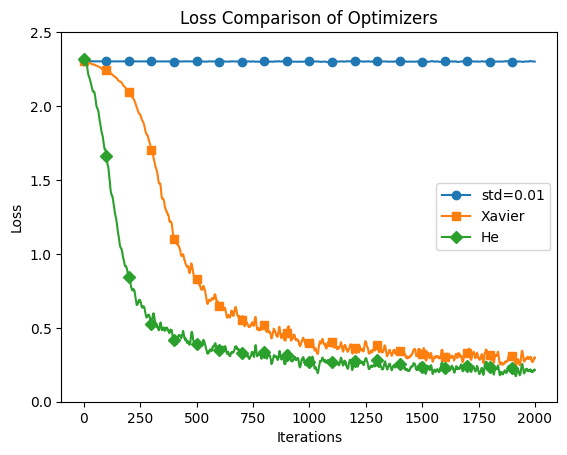

In [1]:
import os, sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {"std=0.01": 0.01, "Xavier": "sigmoid", "He": "relu"}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100],
        output_size=10,
        weight_init_std=weight_type,
    )
    train_loss[key] = []

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)

    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

        if i % 100 == 0:
            loss = networks[key].loss(x_batch, t_batch)
            print(f"Iteration {i}, {key} Loss: {loss}")

markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(
        x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key
    )
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim(0, 2.5)
plt.legend()
plt.title("Loss Comparison of Optimizers")
plt.legend()
plt.show()